In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.io as sio
import h5py

# Define functions for generating a synthetic noise

In [2]:
def add_noise(image, shot_noise=0.01, read_noise=0.0005):
  """Adds random shot (proportional to image) and read (independent) noise."""
  variance = image * shot_noise + read_noise
  sigma=np.sqrt(variance)
  noise=sigma *np.random.normal(0,1,(np.shape(image)[0],np.shape(image)[1]))

  out      = image + noise

  out=np.maximum(0.0,np.minimum(out,1.0))

  return out.astype(np.float32)

def random_noise_levels():
  """Generates random noise levels from a log-log linear distribution."""
  log_min_shot_noise = np.log(0.0001)
  log_max_shot_noise = np.log(0.012)
  log_shot_noise     = np.random.uniform(log_min_shot_noise, log_max_shot_noise)

  shot_noise = np.exp(log_shot_noise)

  line = lambda x: 2.18 * x + 1.20
  n= np.random.normal(0,0.26)
  log_read_noise = line(log_shot_noise) + n
  read_noise     = np.exp(log_read_noise)
  return shot_noise, read_noise

# Set parameters for the noise

In [7]:
alpha = 0.01
beta = 0.02 ## beta == sigma in the paper
sigma = beta

# 1. Load the FiveK dataset

In [3]:
file_name='./Fivek_train_set.hdf5'
tr_data= h5py.File(file_name,"r")
tr_clean_array=tr_data["clean_images"]
print(np.shape(tr_clean_array))

(25000, 256, 256)


In [4]:
file_name='./Fivek_test_set.mat'
te_data= sio.loadmat(file_name)
te_clean_array=te_data["clean_images"]
print(np.shape(te_clean_array))

(200, 512, 512)


0.0 0.99993896 (512, 512)


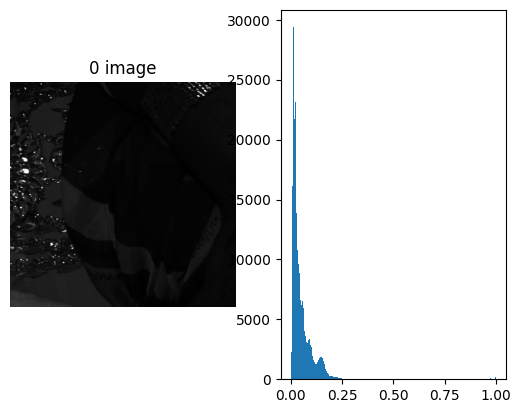

0.0647583 0.27404785 (512, 512)


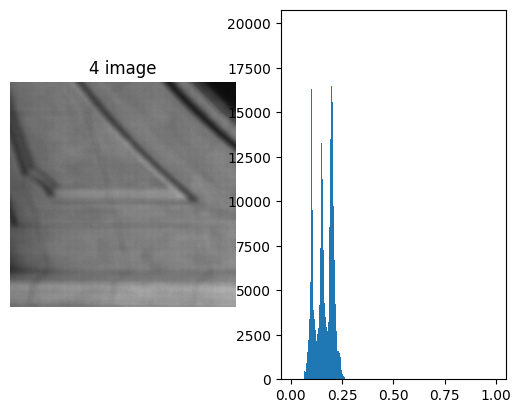

0.0048828125 0.2783203 (512, 512)


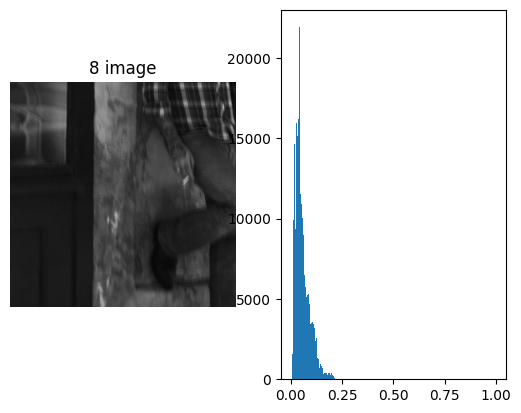

0.050720215 0.15020752 (512, 512)


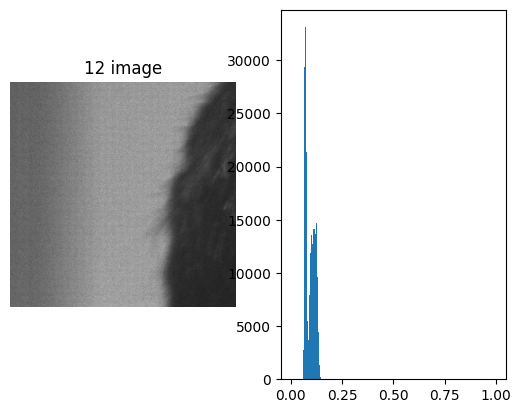

0.08203125 0.19042969 (512, 512)


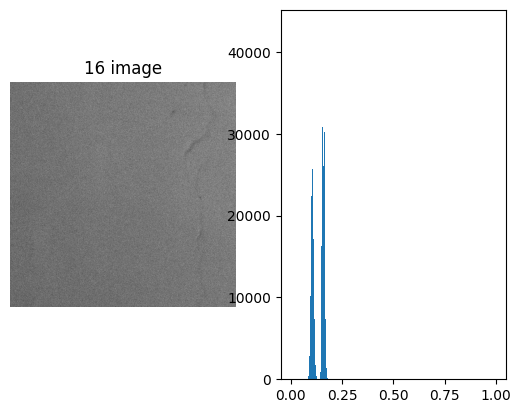

0.032226562 0.99975586 (512, 512)


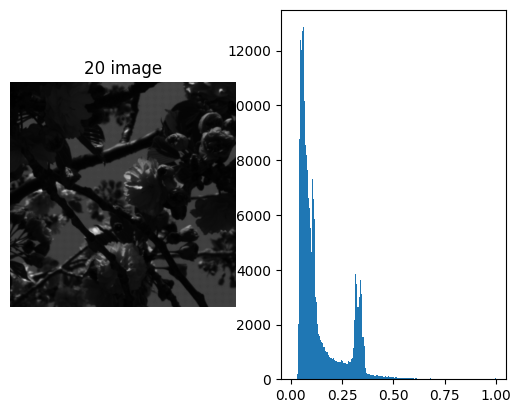

0.0 0.36523438 (512, 512)


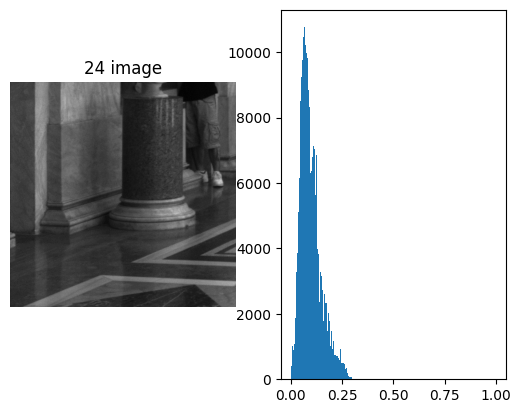

0.013305664 0.99993896 (512, 512)


KeyboardInterrupt: 

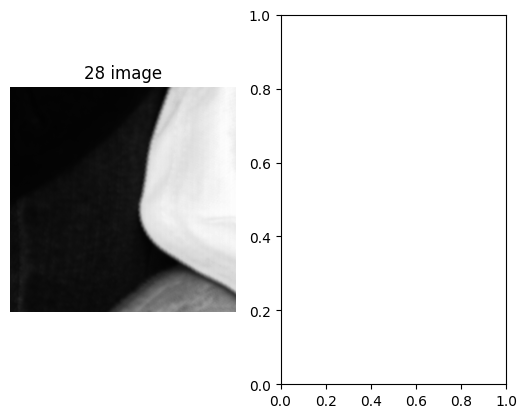

In [6]:
import PIL
import matplotlib.pyplot as plt
i = 0
bins = np.linspace(0,1,256)
while i < te_clean_array.shape[0]:
    img = te_clean_array[i]
    print(img.min(),img.max(),img.shape)
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title(f'{i} image')
    plt.imshow(img,cmap='gray')
    plt.subplot(1,2,2)
    plt.hist(img.flatten(),bins)
    plt.pause(0.1)
    i += 4


In [8]:
# create multiple synthetic datasetsd

alpha_beta = [[0.01,0.02],[0.05,0.02],[0.01,0.0002]]

for alpha, beta in alpha_beta:
    sigma = beta
    #print(alpha,beta)
    # load original dataset
    file_name='./Fivek_train_set.hdf5'
    tr_data= h5py.File(file_name,"r")
    tr_clean_array=tr_data["clean_images"]
    print(np.shape(tr_clean_array))
    file_name='./Fivek_test_set.mat'
    te_data= sio.loadmat(file_name)
    te_clean_array=te_data["clean_images"]
    print(np.shape(te_clean_array))
    tr_noisy_array=np.zeros(tr_clean_array.shape)
    # add noise
    for i in range(0, tr_clean_array.shape[0]):
        tr_noisy_array[i] = add_noise(tr_clean_array[i], alpha, sigma**2)
        
    te_noisy_array=np.zeros(te_clean_array.shape)
    for i in range(0, te_clean_array.shape[0]):
        te_noisy_array[i] = add_noise(te_clean_array[i], alpha, sigma**2)
    f1 = h5py.File("./train_fivek_rawRGB_25000x256x256_cropped_alpha_"+str(alpha)+"_beta_"+str(beta)+".hdf5", "w")
    f1.create_dataset("noisy_images", tr_noisy_array.shape, dtype='f', data=tr_noisy_array)
    f1.create_dataset("clean_images", tr_clean_array.shape, dtype='f', data=tr_clean_array)
    f1.close()

    f2 = h5py.File("./test_fivek_rawRGB_alpha_"+str(alpha)+"_beta_"+str(beta)+".hdf5", "w")
    f2.create_dataset("noisy_images", te_noisy_array.shape, dtype='f', data=te_noisy_array)
    f2.create_dataset("clean_images", te_clean_array.shape, dtype='f', data=te_clean_array)
    f2.close()  
    print(f"Create dataset alpha : {alpha} beta : {beta} completed")

(25000, 256, 256)
(200, 512, 512)
Create dataset alpha : 0.01 beta : 0.02 completed
(25000, 256, 256)
(200, 512, 512)
Create dataset alpha : 0.05 beta : 0.02 completed
(25000, 256, 256)
(200, 512, 512)
Create dataset alpha : 0.01 beta : 0.0002 completed


# 2. Generate synthtic datasets

In [ ]:
tr_noisy_array=np.zeros(tr_clean_array.shape)
for i in range(0, tr_clean_array.shape[0]):
    tr_noisy_array[i] = add_noise(tr_clean_array[i], alpha, sigma**2)
    
te_noisy_array=np.zeros(te_clean_array.shape)
for i in range(0, te_clean_array.shape[0]):
    te_noisy_array[i] = add_noise(te_clean_array[i], alpha, sigma**2)

# 3. Save datasets

In [ ]:
f1 = h5py.File("./train_fivek_rawRGB_25000x256x256_cropped_alpha_"+str(alpha)+"_beta_"+str(beta)+".hdf5", "w")
f1.create_dataset("noisy_images", tr_noisy_array.shape, dtype='f', data=tr_noisy_array)
f1.create_dataset("clean_images", tr_clean_array.shape, dtype='f', data=tr_clean_array)
f1.close()

f2 = h5py.File("./test_fivek_rawRGB_alpha_"+str(alpha)+"_beta_"+str(beta)+".hdf5", "w")
f2.create_dataset("noisy_images", te_noisy_array.shape, dtype='f', data=te_noisy_array)
f2.create_dataset("clean_images", te_clean_array.shape, dtype='f', data=te_clean_array)
f2.close()